## Import libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV


# Example: CSV file hosted online
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

# Read CSV directly from URL
iris = pd.read_csv(url)

# Check the first rows
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explore Data

In [20]:
iris.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [21]:
print(iris.describe())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [22]:
print(iris.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## EDA

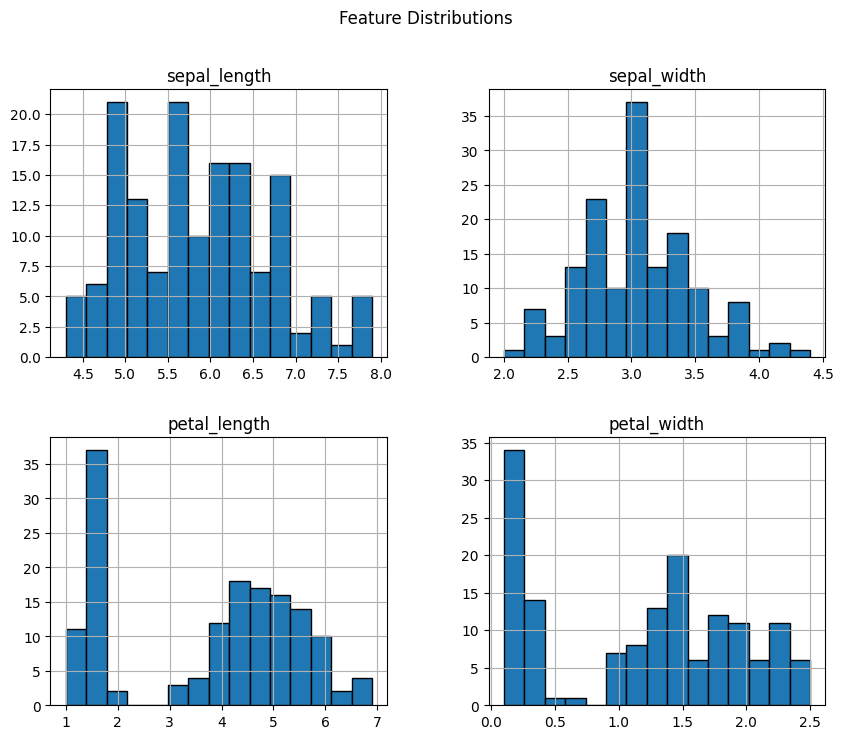

In [23]:
# Histogram for all numeric features
iris.hist(figsize=(10,8), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


## Correlation heatmap

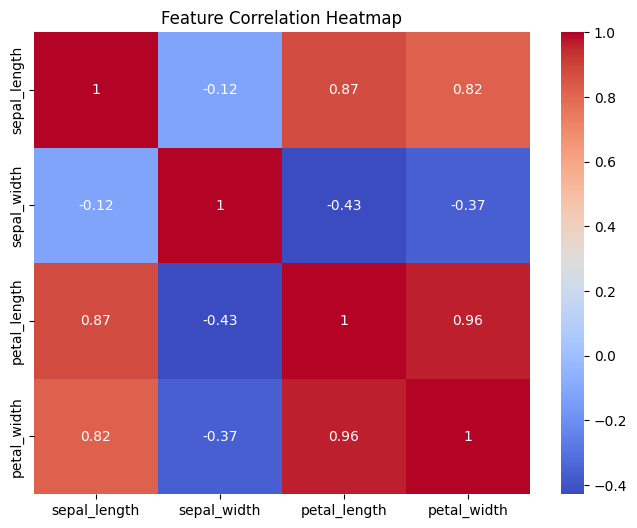

In [2]:
corr = iris.iloc[:, :-1].corr()  # only numeric features
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## Pairwise relationships (scatter plots)

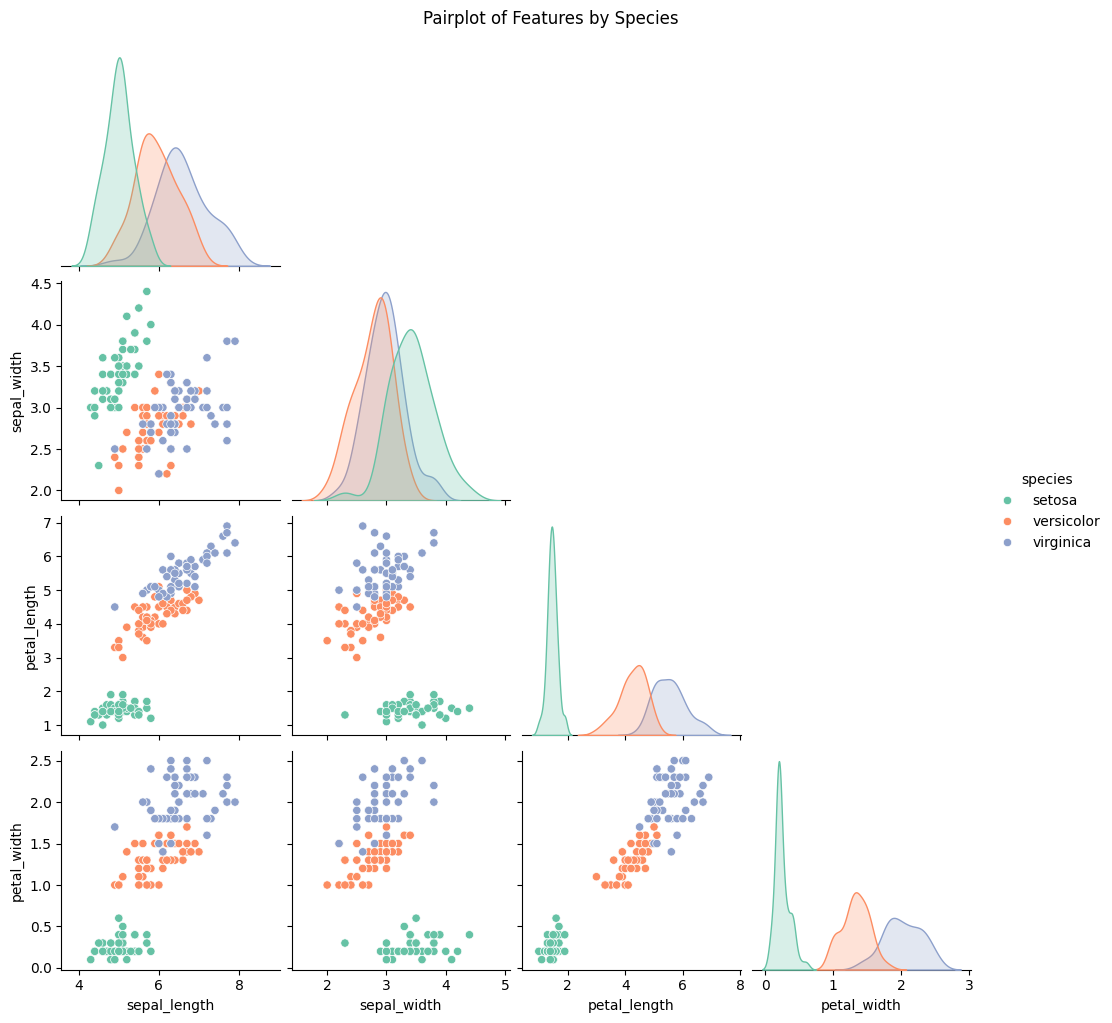

In [24]:
sns.pairplot(iris, hue='species', corner=True, palette='Set2')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()


## Boxplots by species

C:\Users\Ismat\AppData\Local\Temp\ipykernel_17620\3535890510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=iris, palette='Set3')
C:\Users\Ismat\AppData\Local\Temp\ipykernel_17620\3535890510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=iris, palette='Set3')
C:\Users\Ismat\AppData\Local\Temp\ipykernel_17620\3535890510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=iris, palette='Set3')
C:\Users\Ismat\AppData\Local\Temp\ipykernel_17620\3535890510.py:4: 

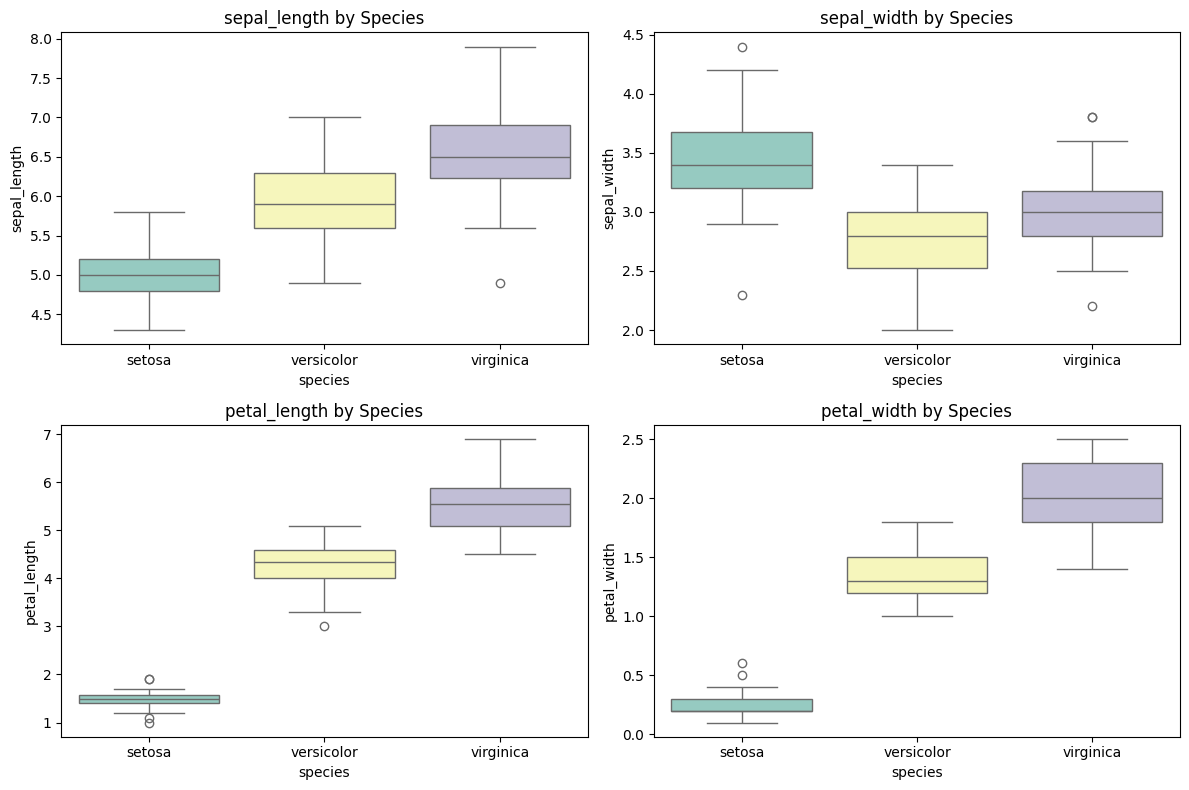

In [25]:
plt.figure(figsize=(12,8))
for i, col in enumerate(iris.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='species', y=col, data=iris, palette='Set3')
    plt.title(f"{col} by Species")
plt.tight_layout()
plt.show()


## Split the data 

In [26]:

# Features and target
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris['species'].values

# Encode target labels to numbers
le = LabelEncoder()
y = le.fit_transform(y)

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## Training different Model with optimization and plot actual vs. predicted

In [29]:
def plotResults_iris(X_test, y_test, y_pred, feature_names, model_name="Model"):
    df = pd.DataFrame(X_test[:, :2], columns=feature_names[:2])
    df['Actual'] = y_test
    df['Predicted'] = y_pred

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature_names[0], y=feature_names[1],
                   hue="Actual", palette="coolwarm", s=100, edgecolor="black", alpha=0.6, legend='full')
    sns.scatterplot(data=df, x=feature_names[0], y=feature_names[1],
                   hue="Predicted", palette="coolwarm", s=60, marker="X", edgecolor="black", legend=False)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.show()


## Logistic Regression

LR Score: 0.9667


c:\Users\Ismat\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Ismat\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


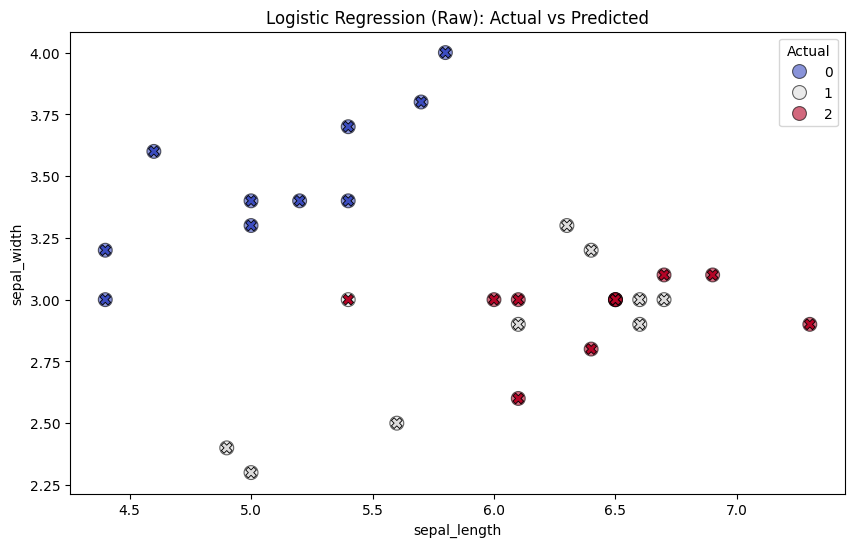

In [30]:


model_LR = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)
model_LR.fit(X_train, y_train)  # use raw X_train

y_pred_LR = model_LR.predict(X_test)  # predictions on raw X_test
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
score_LR = model_LR.score(X_test, y_test)
print(f"LR Score: {score_LR:.4f}")
plotResults_iris(X_test, y_test, y_pred_LR, feature_names, model_name="Logistic Regression (Raw)")



## KNN

Optimal k: 6
KNN Score: 0.9667


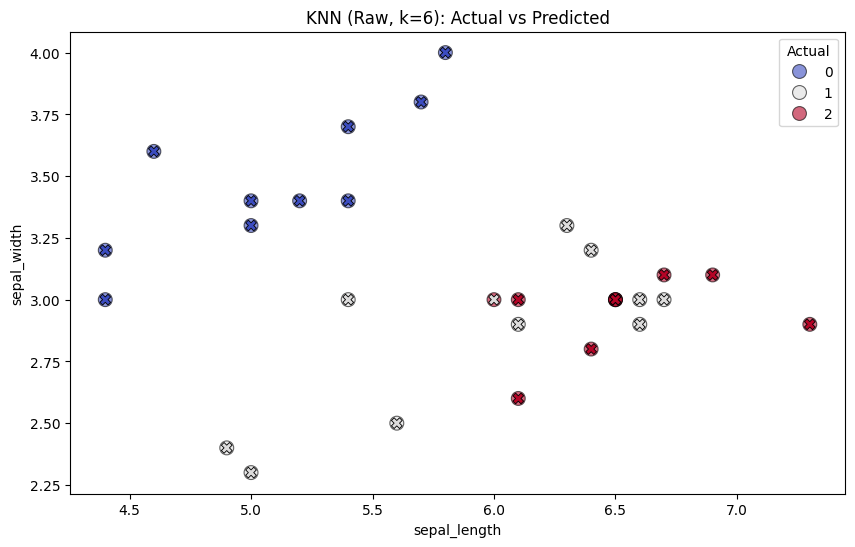

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Find optimal k using cross-validation
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Optimal k
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k: {optimal_k}")
model_KNN = KNeighborsClassifier(n_neighbors=optimal_k)
model_KNN.fit(X_train, y_train)

# Predictions
y_pred_KNN = model_KNN.predict(X_test)

# Accuracy
score_KNN = model_KNN.score(X_test, y_test)
print(f"KNN Score: {score_KNN:.4f}")

plotResults_iris(X_test, y_test, y_pred_KNN, feature_names, model_name=f"KNN (Raw, k={optimal_k})")


## SVM

Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 1000}
SVM Score: 0.9333


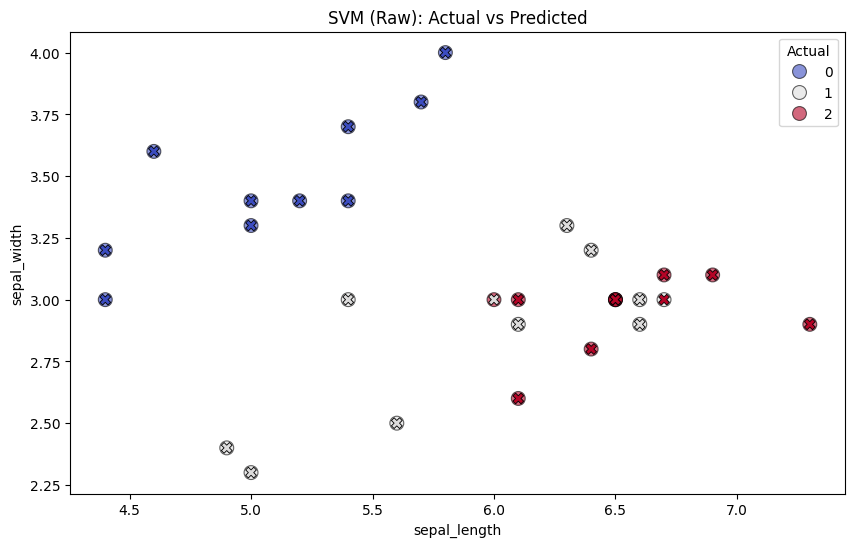

In [33]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'max_iter': [1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf'],
    'max_iter': [1000]
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
best_params = grid_svm.best_params_
print(f"Best parameters: {best_params}")

# Train SVM with best parameters
model_SVM = SVC(**best_params)
model_SVM.fit(X_train, y_train)

# Predictions
y_pred_SVM = model_SVM.predict(X_test)

# Accuracy
score_SVM = model_SVM.score(X_test, y_test)
print(f"SVM Score: {score_SVM:.4f}")
plotResults_iris(X_test, y_test, y_pred_SVM, feature_names, model_name="SVM (Raw)")


## Decision Tree

Best parameters for Decision Tree: {'criterion': 'gini', 'max_leaf_nodes': 5, 'random_state': 42}
Decision Tree Score: 0.9667


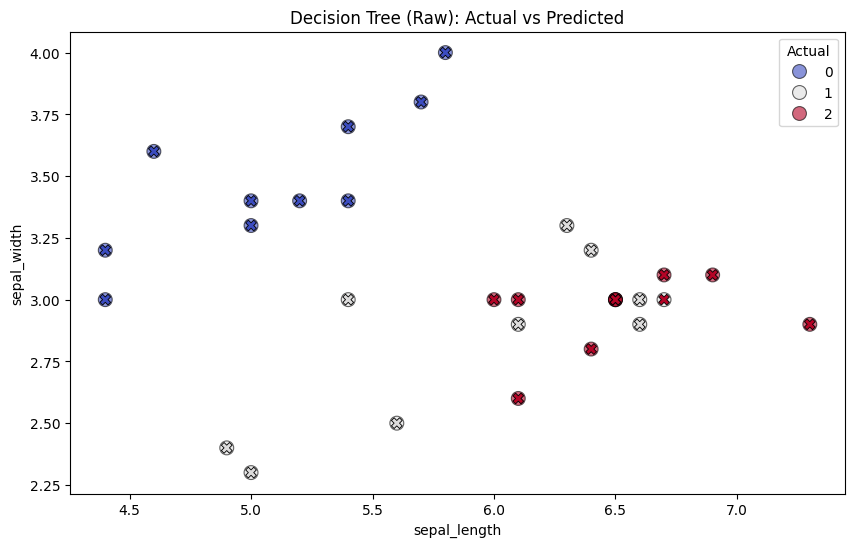

In [35]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [5, 10, 15, 20, None],
    'random_state': [42]
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_params_dt = grid_dt.best_params_
print(f"Best parameters for Decision Tree: {best_params_dt}")

# Train Decision Tree with best parameters
model_DT = DecisionTreeClassifier(**best_params_dt)
model_DT.fit(X_train, y_train)

# Predictions
y_pred_DT = model_DT.predict(X_test)

# Accuracy
score_DT = model_DT.score(X_test, y_test)
print(f"Decision Tree Score: {score_DT:.4f}")
plotResults_iris(X_test, y_test, y_pred_DT, feature_names, model_name="Decision Tree (Raw)")


## Random Forest

Best parameters for Random Forest: {'bootstrap': True, 'n_estimators': 50, 'random_state': 42}
Random Forest Score: 0.9000


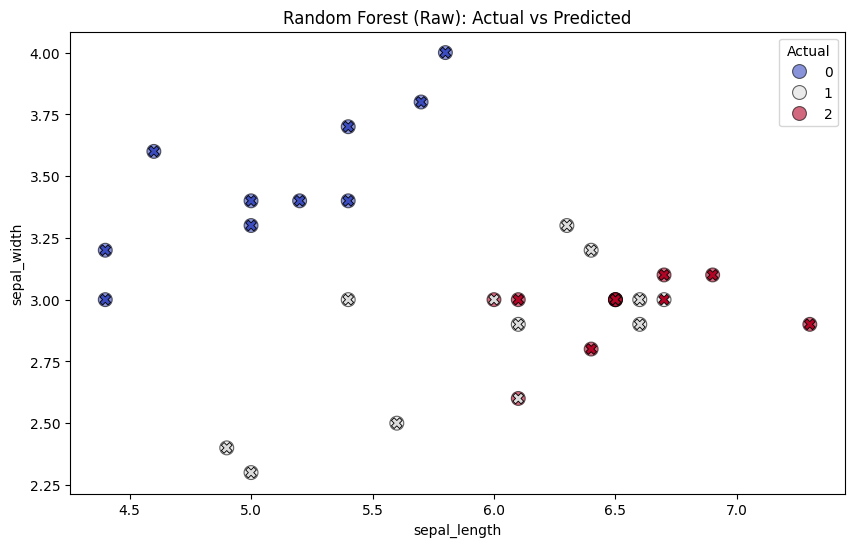

In [36]:
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'bootstrap': [True, False],
    'random_state': [42]
}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
best_params_rf = grid_rf.best_params_
print(f"Best parameters for Random Forest: {best_params_rf}")

# Train Random Forest with best parameters
model_RF = RandomForestClassifier(**best_params_rf)
model_RF.fit(X_train, y_train)

# Predictions
y_pred_RF = model_RF.predict(X_test)

# Accuracy
score_RF = model_RF.score(X_test, y_test)
print(f"Random Forest Score: {score_RF:.4f}")
plotResults_iris(X_test, y_test, y_pred_RF, feature_names, model_name="Random Forest (Raw)")


## Naive Bayes

Gaussian Naive Bayes Score: 0.9667


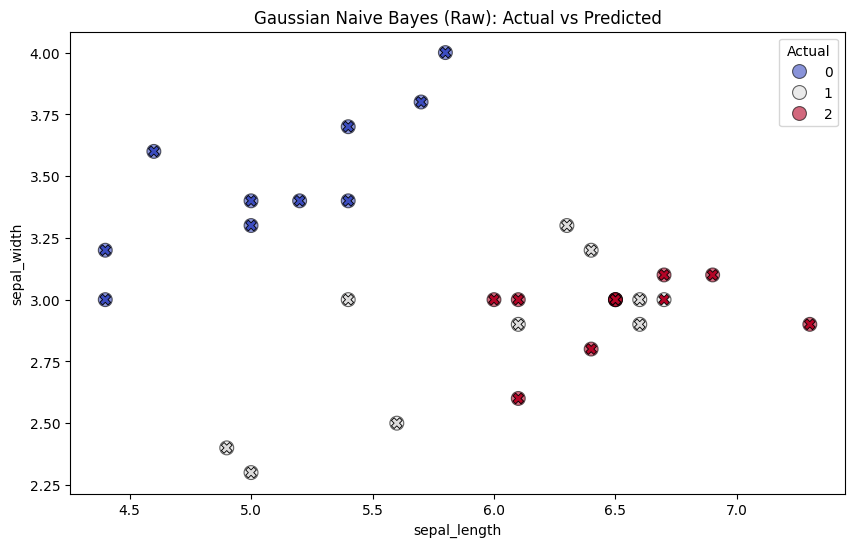

In [37]:
# Train Gaussian Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predictions
y_pred_NB = model_NB.predict(X_test)

# Accuracy
score_NB = model_NB.score(X_test, y_test)
print(f"Gaussian Naive Bayes Score: {score_NB:.4f}")
plotResults_iris(X_test, y_test, y_pred_NB, feature_names, model_name="Gaussian Naive Bayes (Raw)")


## Confusion Matrix and Plot

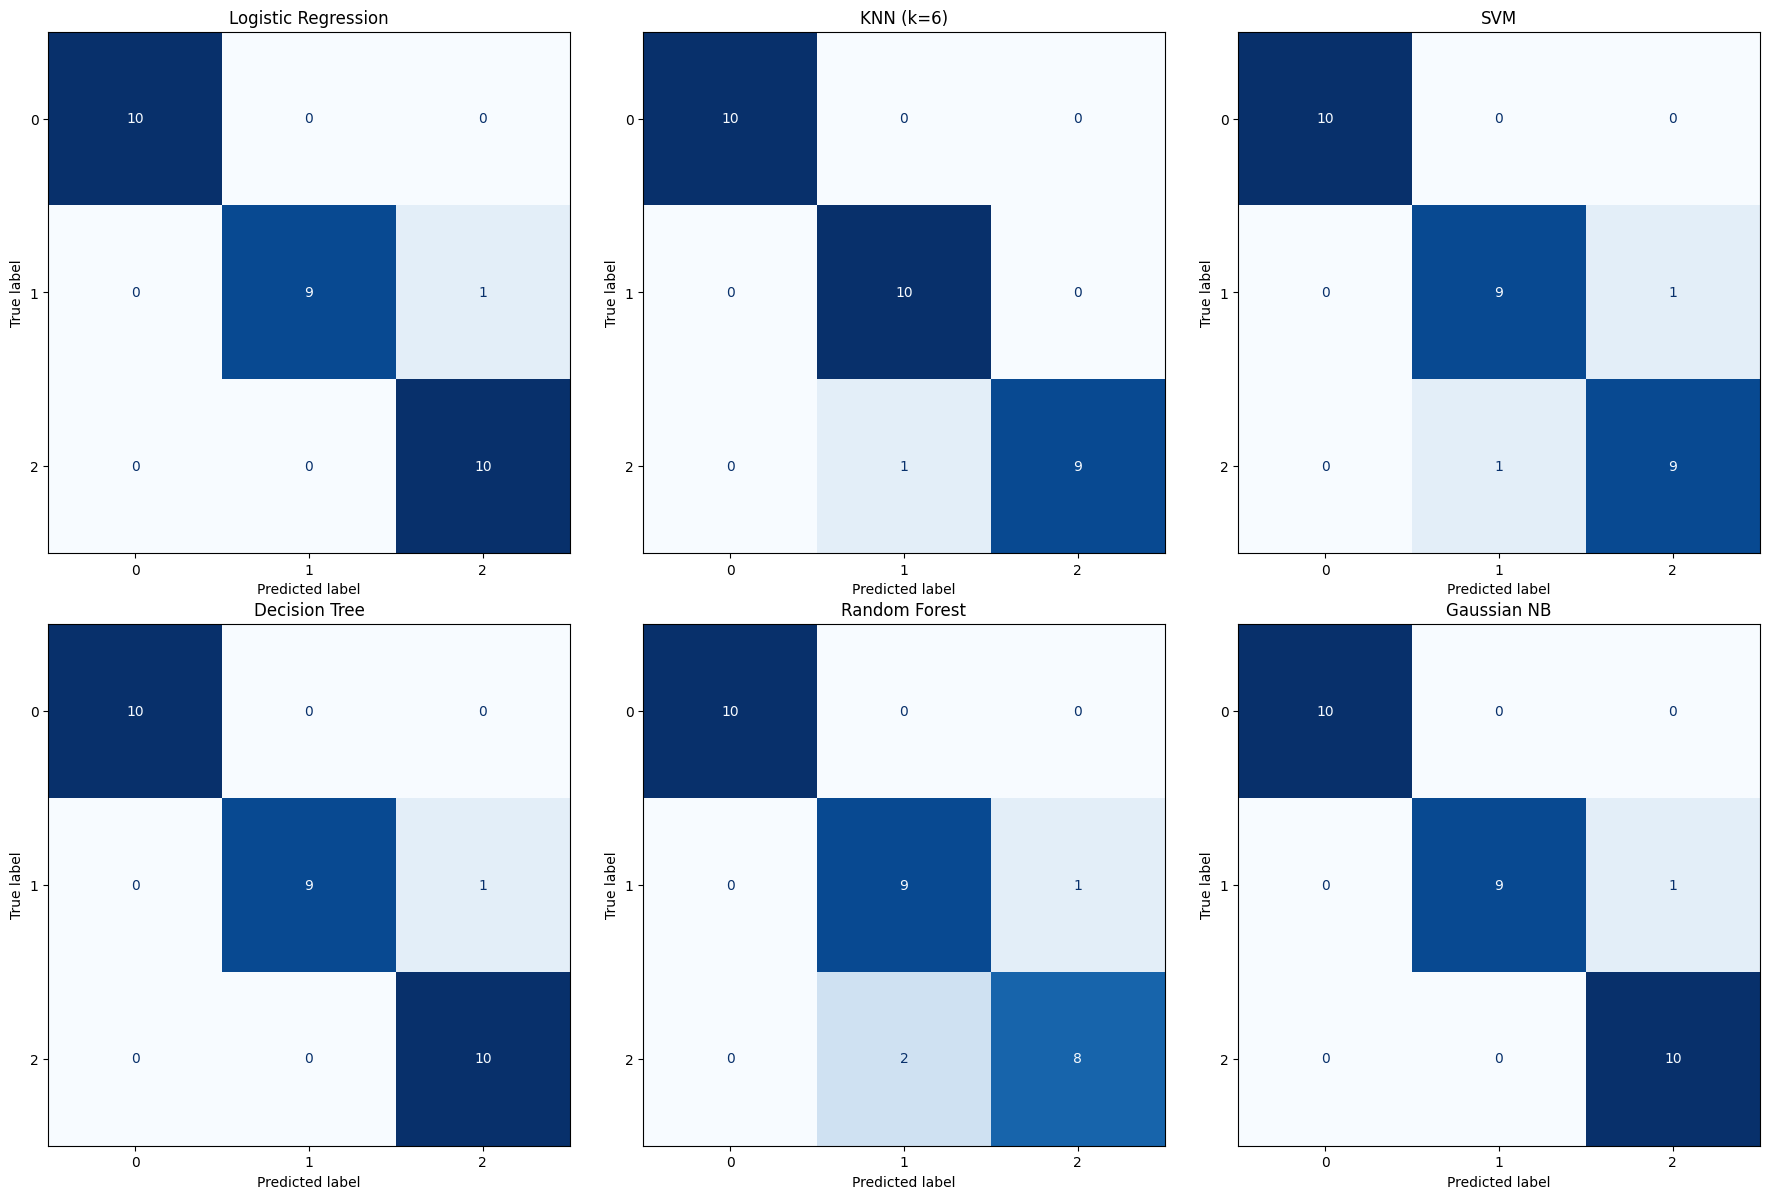

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
models = [model_LR, model_KNN, model_SVM, model_DT, model_RF, model_NB]
predictions = [y_pred_LR, y_pred_KNN, y_pred_SVM, y_pred_DT, y_pred_RF, y_pred_NB]
names = ["Logistic Regression", f"KNN (k={optimal_k})", "SVM", "Decision Tree", "Random Forest", "Gaussian NB"]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for ax, model_name, y_pred in zip(axes.flatten(), names, predictions):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(model_name)

plt.tight_layout()
plt.show()


## Algorithm Comparison

Logistic Regression Accuracy: 0.9667
KNN (k=6) Accuracy: 0.9667
SVM Accuracy: 0.9333
Decision Tree Accuracy: 0.9667
Random Forest Accuracy: 0.9000
Gaussian NB Accuracy: 0.9667


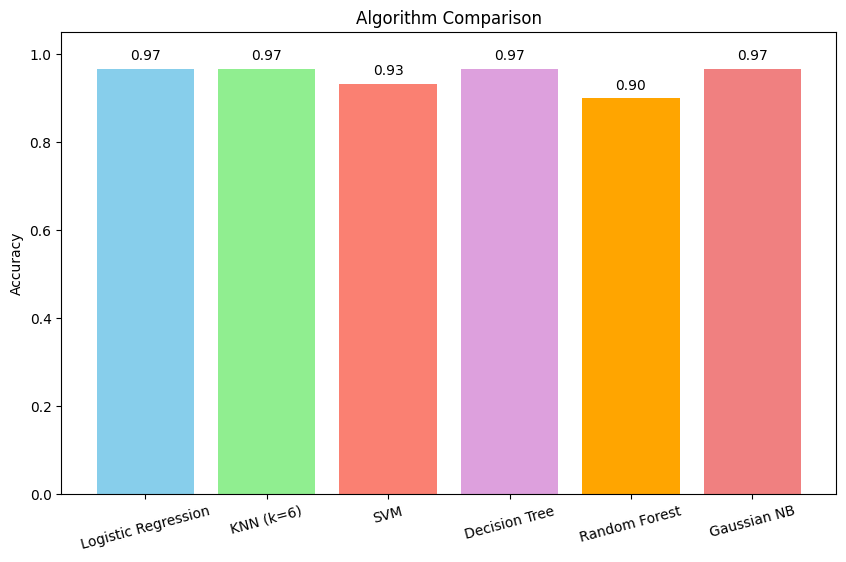

In [41]:
# Model names
model_names = ["Logistic Regression", f"KNN (k={optimal_k})", "SVM", "Decision Tree", "Random Forest", "Gaussian NB"]

# Accuracy values
accuracies = [
    model_LR.score(X_test, y_test),
    model_KNN.score(X_test, y_test),
    model_SVM.score(X_test, y_test),
    model_DT.score(X_test, y_test),
    model_RF.score(X_test, y_test),
    model_NB.score(X_test, y_test)
]

# Print accuracies
for name, acc in zip(model_names, accuracies):
    print(f"{name} Accuracy: {acc:.4f}")

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color=['skyblue','lightgreen','salmon','plum','orange','lightcoral'])
plt.ylim(0,1.05)
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison")
plt.xticks(rotation=15)

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

plt.show()


## Observations

#### Top performers: Logistic Regression, KNN, Decision Tree, and Gaussian Naive Bayes all achieve 96.67% accuracy.

#### SVM slightly underperforms (93.33%), likely due to unscaled features or default kernel parameters.

#### Random Forest performs lowest (90%), indicating that small datasets may limit the benefit of ensemble methods.

#### Overall: Simple models often perform as well as complex models on small, well-structured datasets like Iris.